In [4]:
from functools import partial
from dataclasses import dataclass
from typing import Any, Callable
from __future__ import annotations
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils.extmath import cartesian

In [5]:
np.random.seed(42)

setting = {
    "style": "white",
    "palette": "deep",
    "font": "IPAexGothic",
    "rc": {
        "figure.dpi": 300,
        "figure.figsize": (6, 4),
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.linewidth": 0.8,
        "axes.grid": True,
        "grid.color": ".8",
        "grid.linewidth": 0.5,
        "grid.linestyle": "dotted",
        "axes.edgecolor": ".3",
        "axes.labelcolor": ".3",
        "xtick.color": ".3",
        "ytick.color": ".3",
        "text.color": ".3",
        "figure.constrained_layout.use": True,
    },
}
sns.set(**setting)

warnings.simplefilter("ignore")

In [6]:
train_test_split()

ValueError: At least one array required as input

In [398]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def generate_simulation_data(N, f):
    x = np.random.uniform(0, 1, N)
    p = f(x)
    y = np.random.binomial(1, p, N)

    return train_test_split(x, y, p, test_size=0.5)


x_train, x_test, y_train, y_test, p_train, p_test = generate_simulation_data(
    N=2000, f=lambda x: np.where(x < 0.5, 0.05, 0.95)
)

X_train, X_test = x_train.reshape(-1, 1), x_test.reshape(-1, 1)

In [ ]:
class Simulator():
    

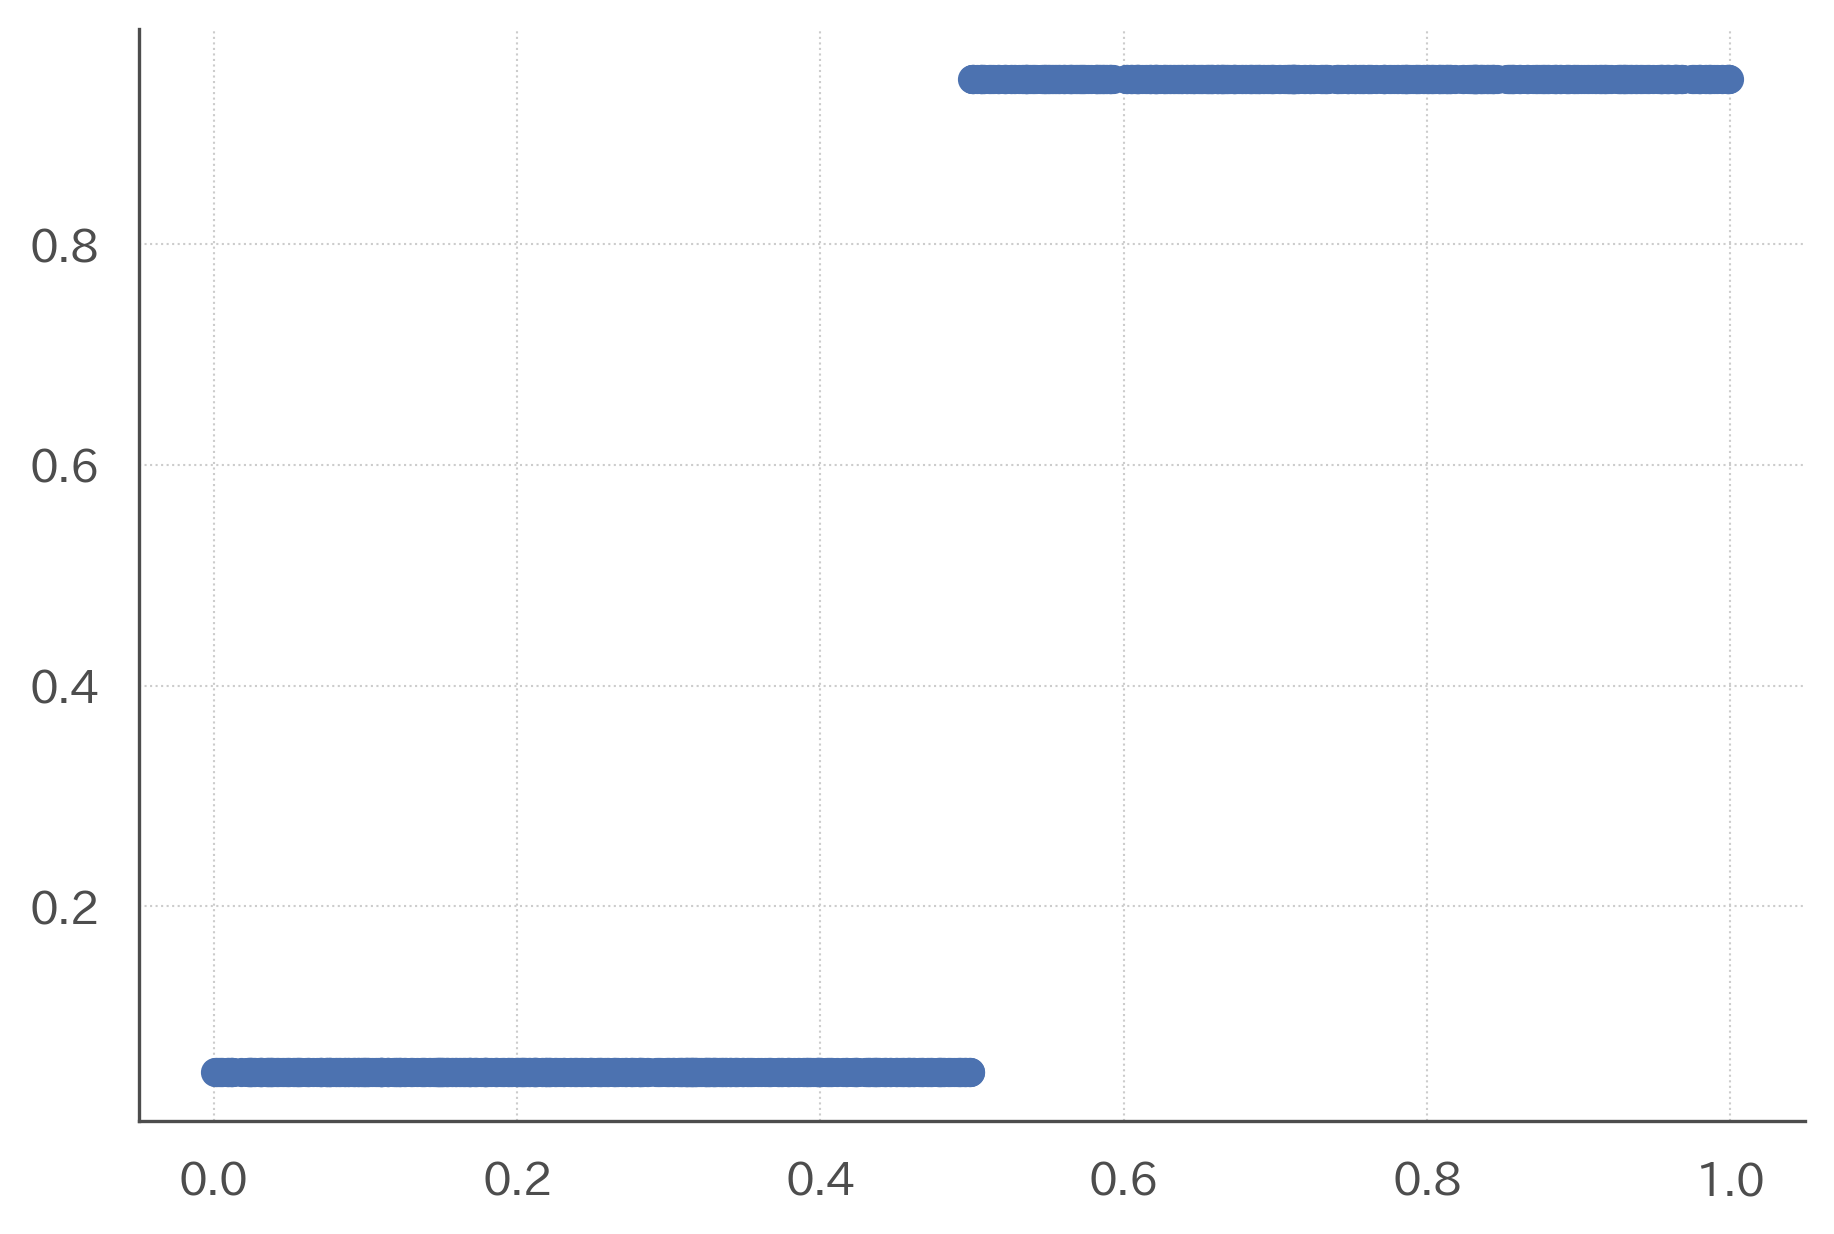

In [399]:
fig, ax = plt.subplots()
ax.scatter(x_train, p_train)

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import classification_report
lr = Pipeline(
    steps=[
        ("poly", PolynomialFeatures(degree=5)),
        ("ss", StandardScaler()),
        ("lr", LogisticRegression(C=1000, max_iter=1000)),
    ]
).fit(X_train, y_train)
y_pred = lr.predict(X_test)
p_pred = lr.predict_proba(X_test)[:, 1]

<AxesSubplot:>

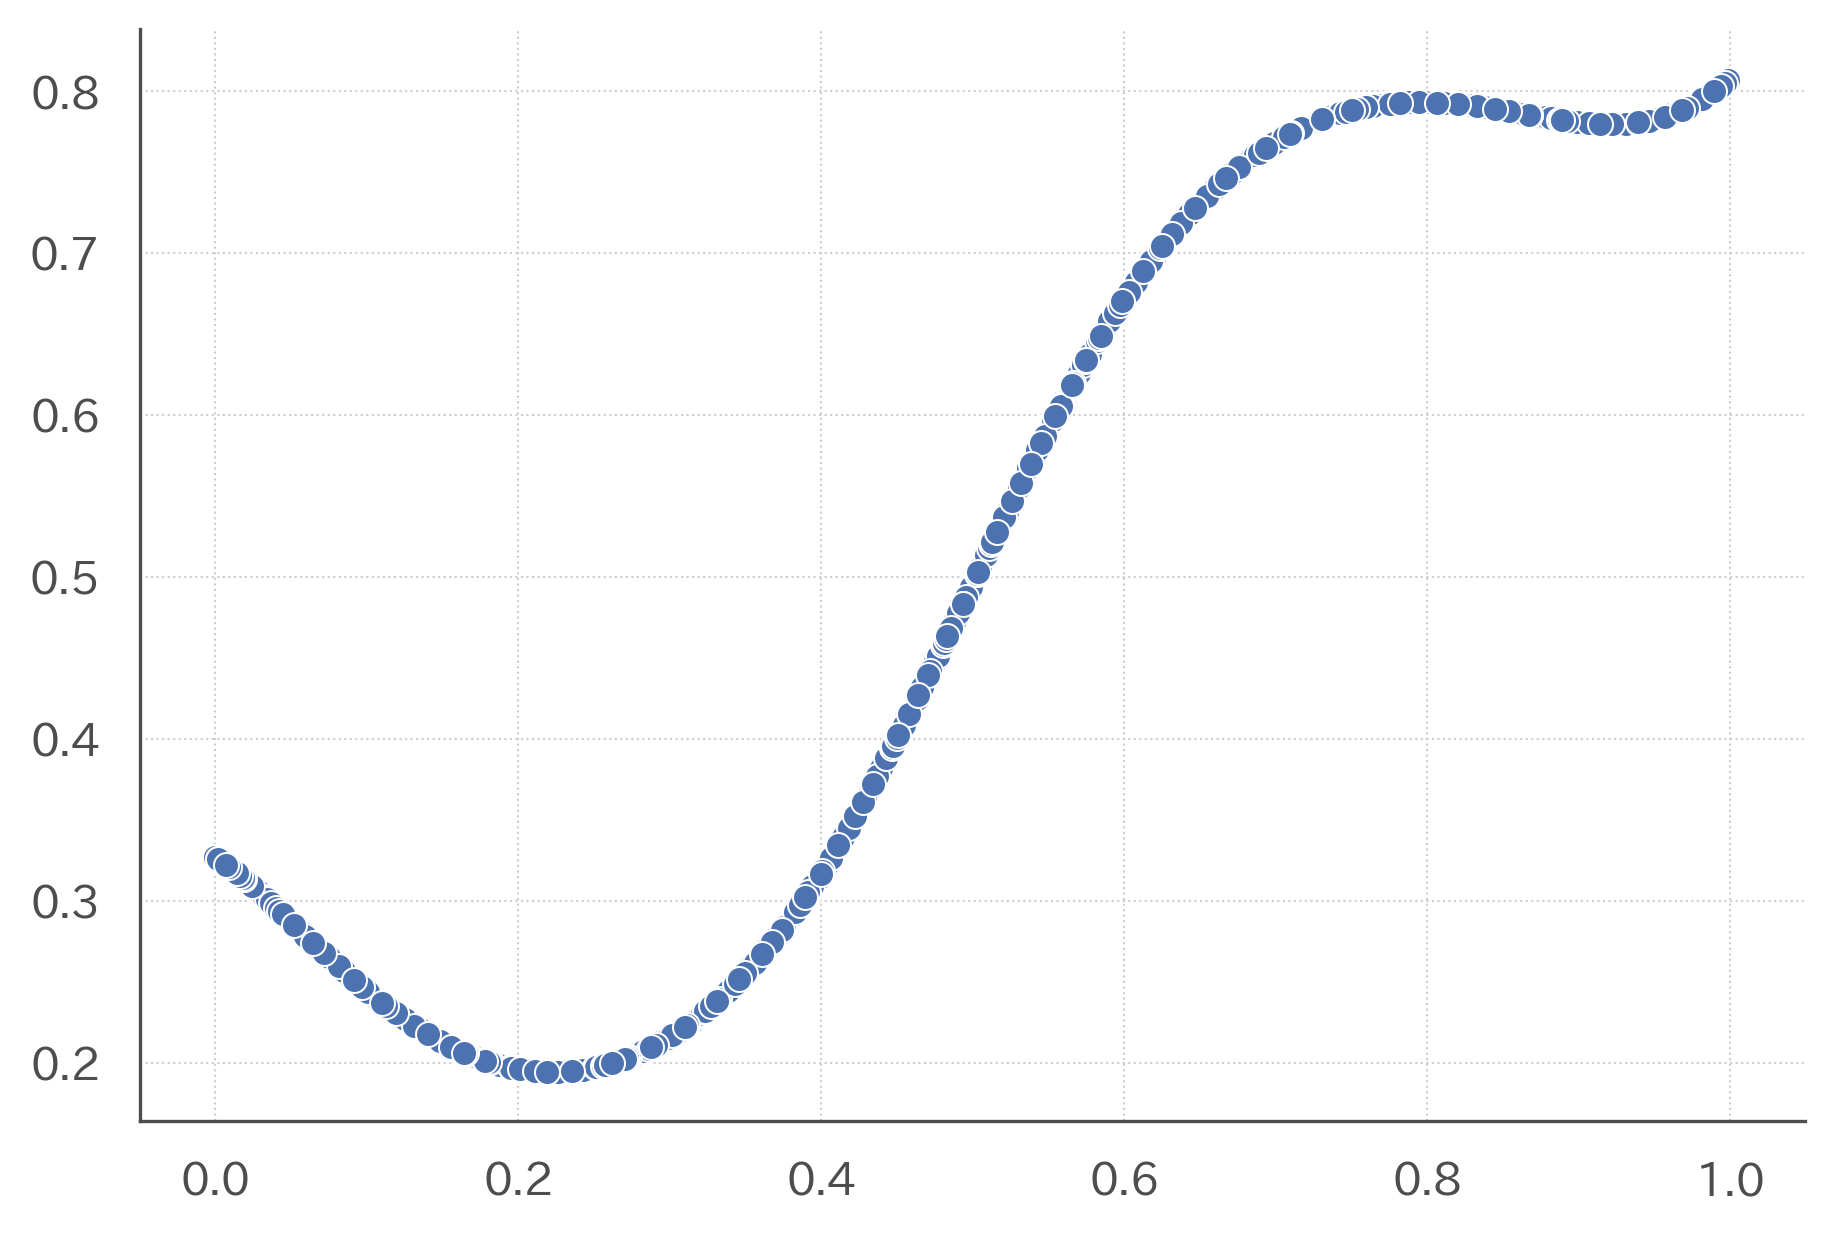

In [333]:
sns.scatterplot(x_test, p_pred)

In [334]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2476
           1       0.75      0.75      0.75      2524

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000



<AxesSubplot:>

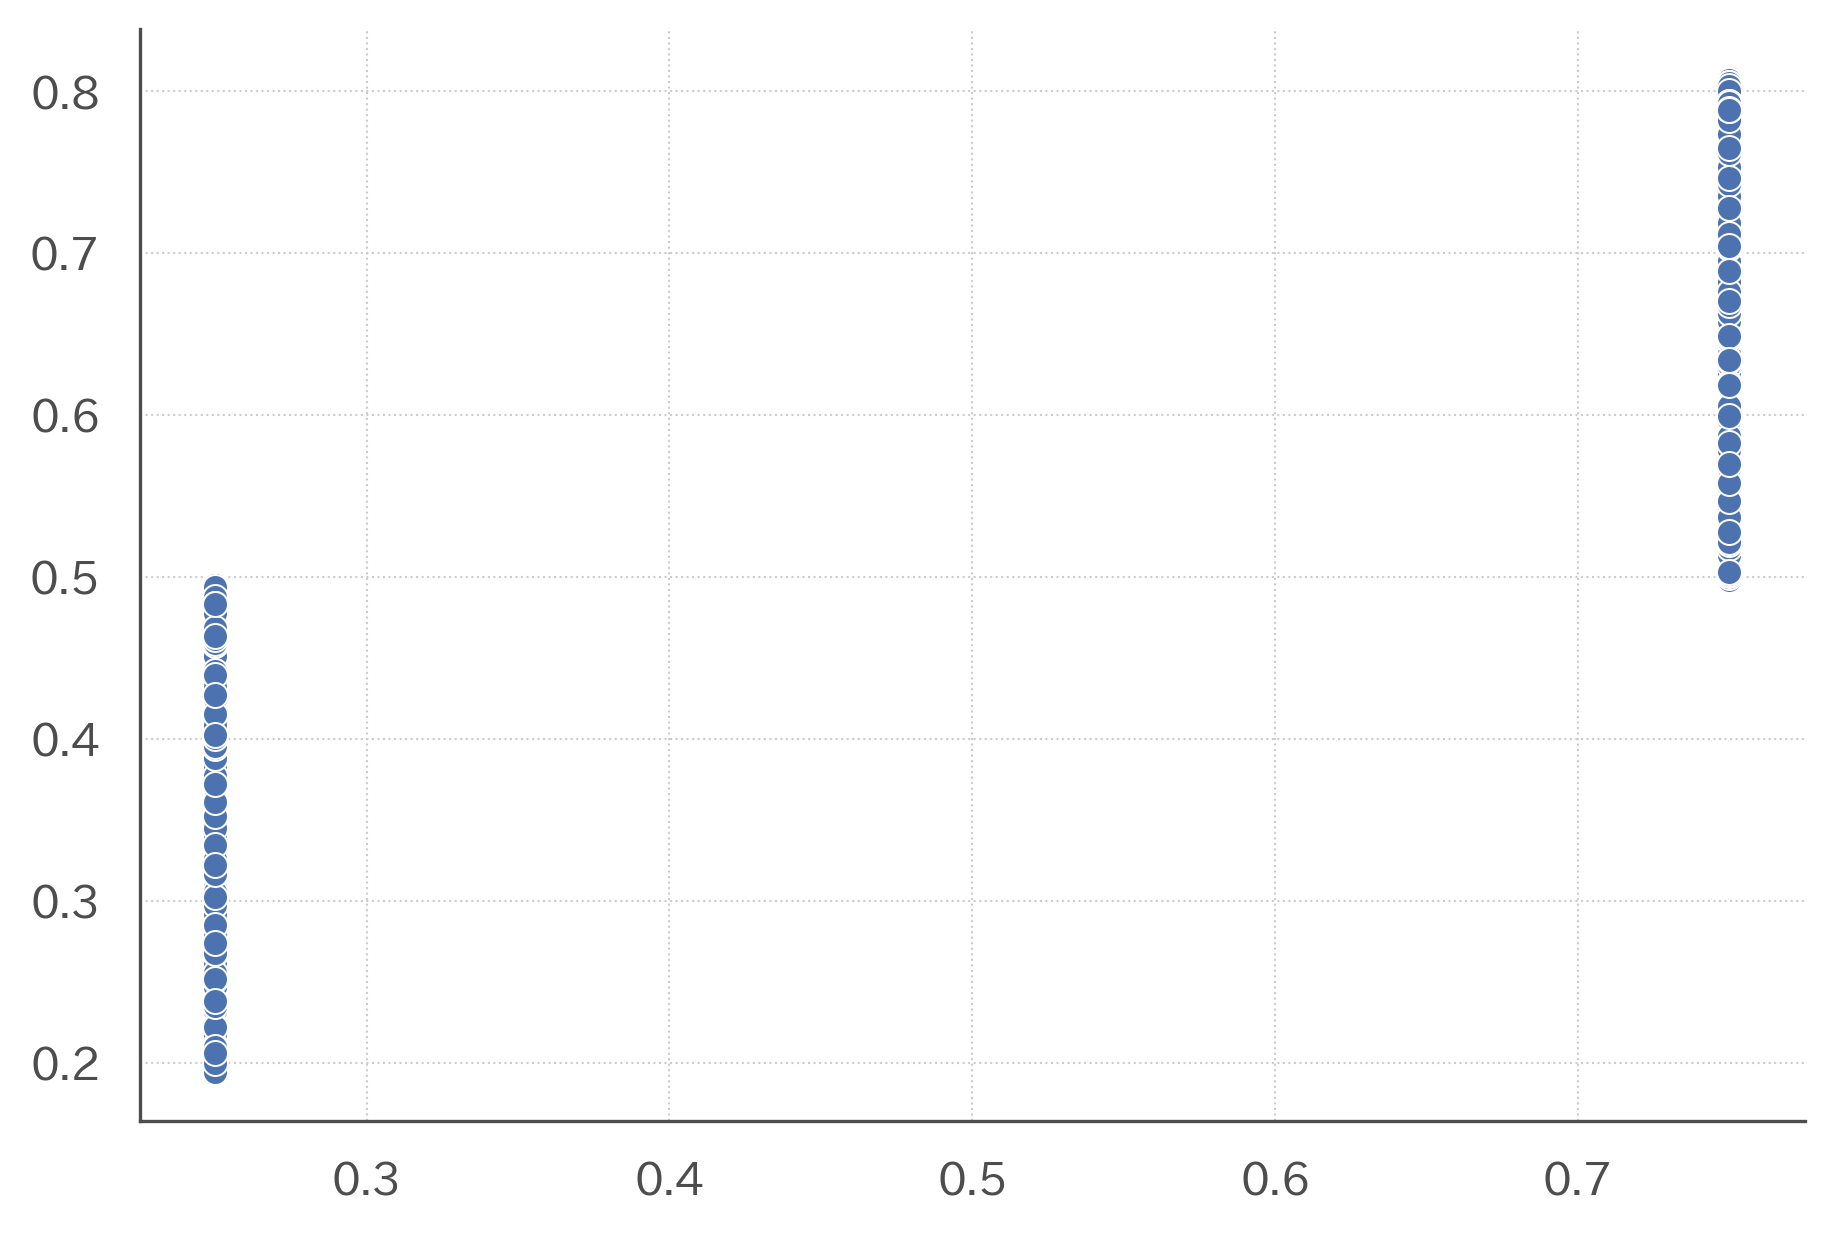

In [335]:
sns.scatterplot(p_test, p_pred)

<AxesSubplot:ylabel='Density'>

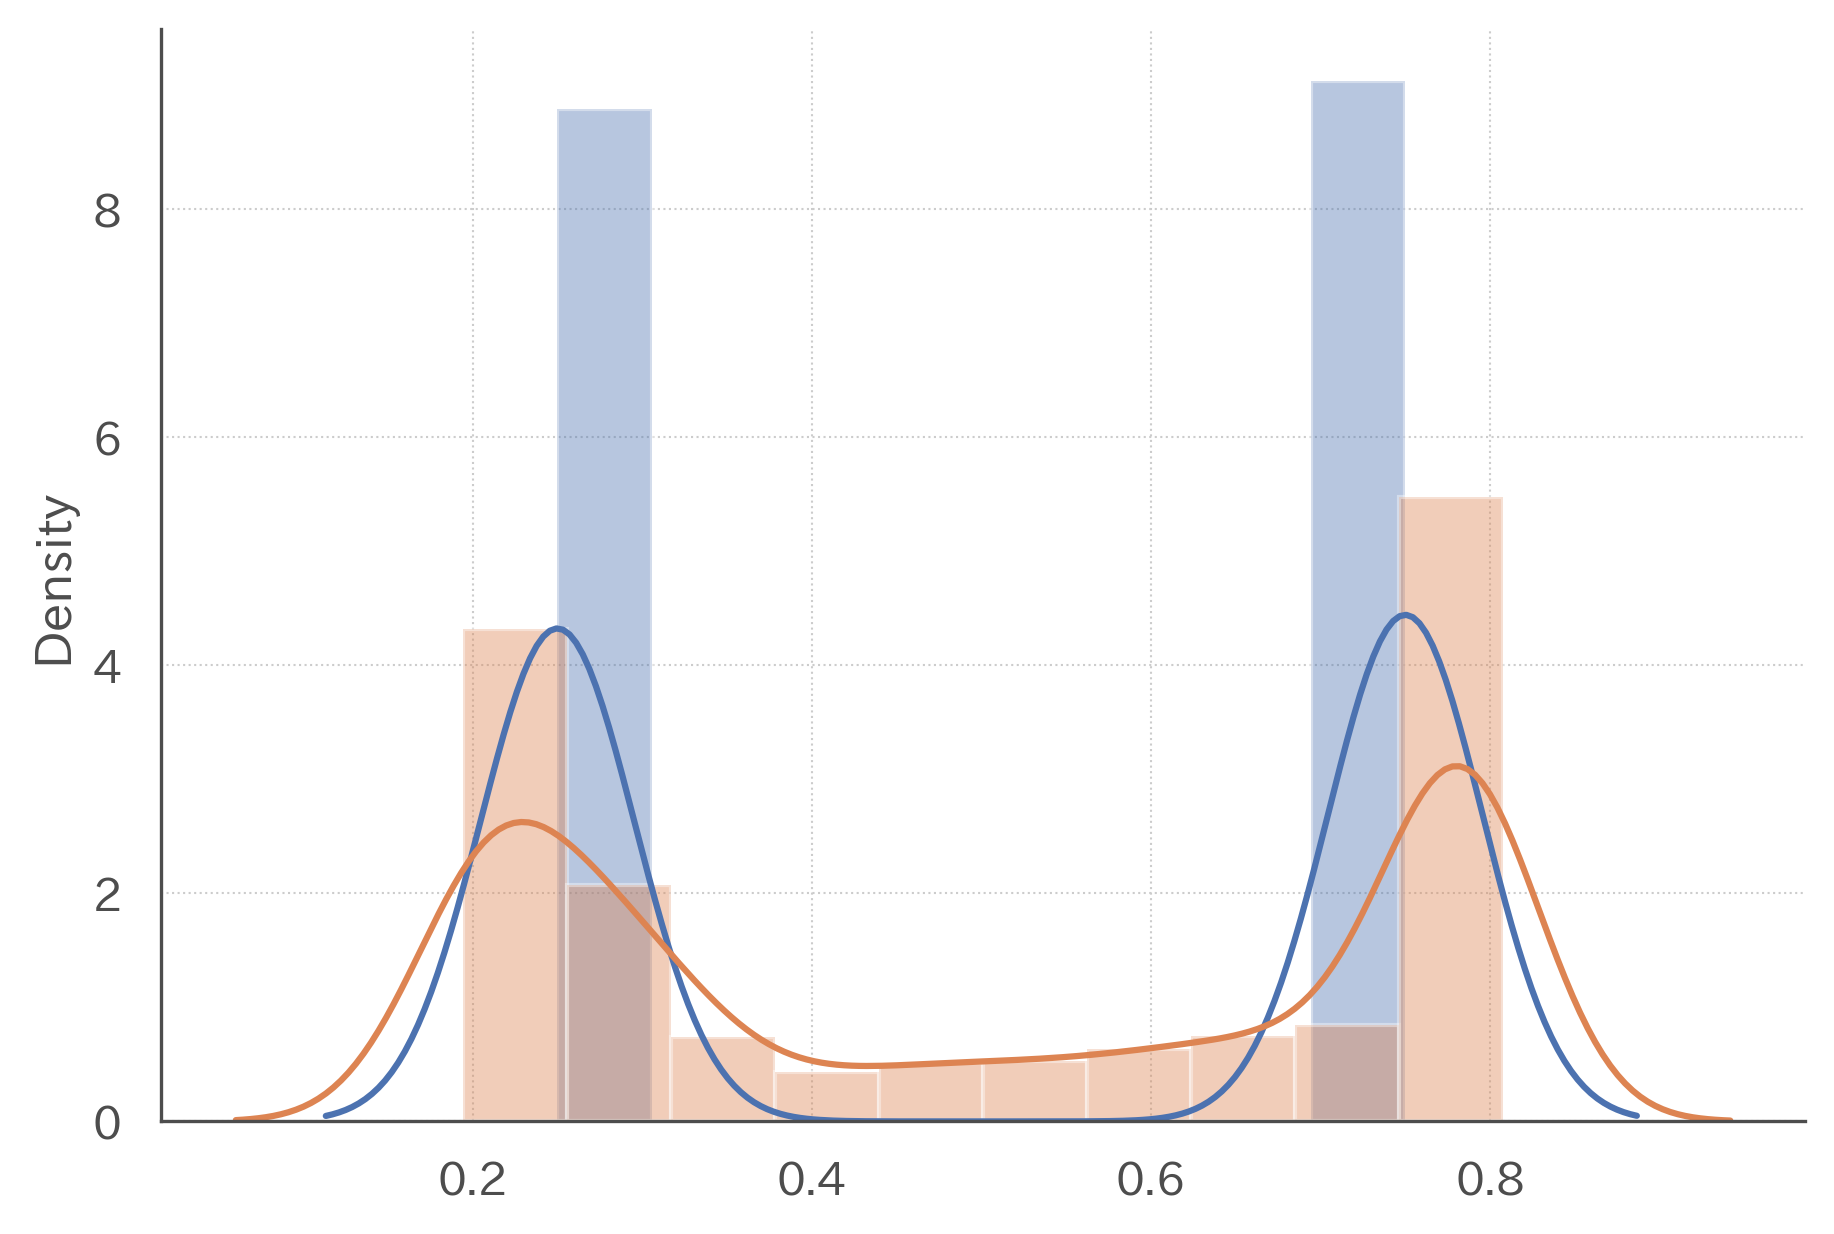

In [336]:
fig, ax = plt.subplots()
sns.distplot(p_test, ax=ax)
sns.distplot(p_pred, ax=ax)

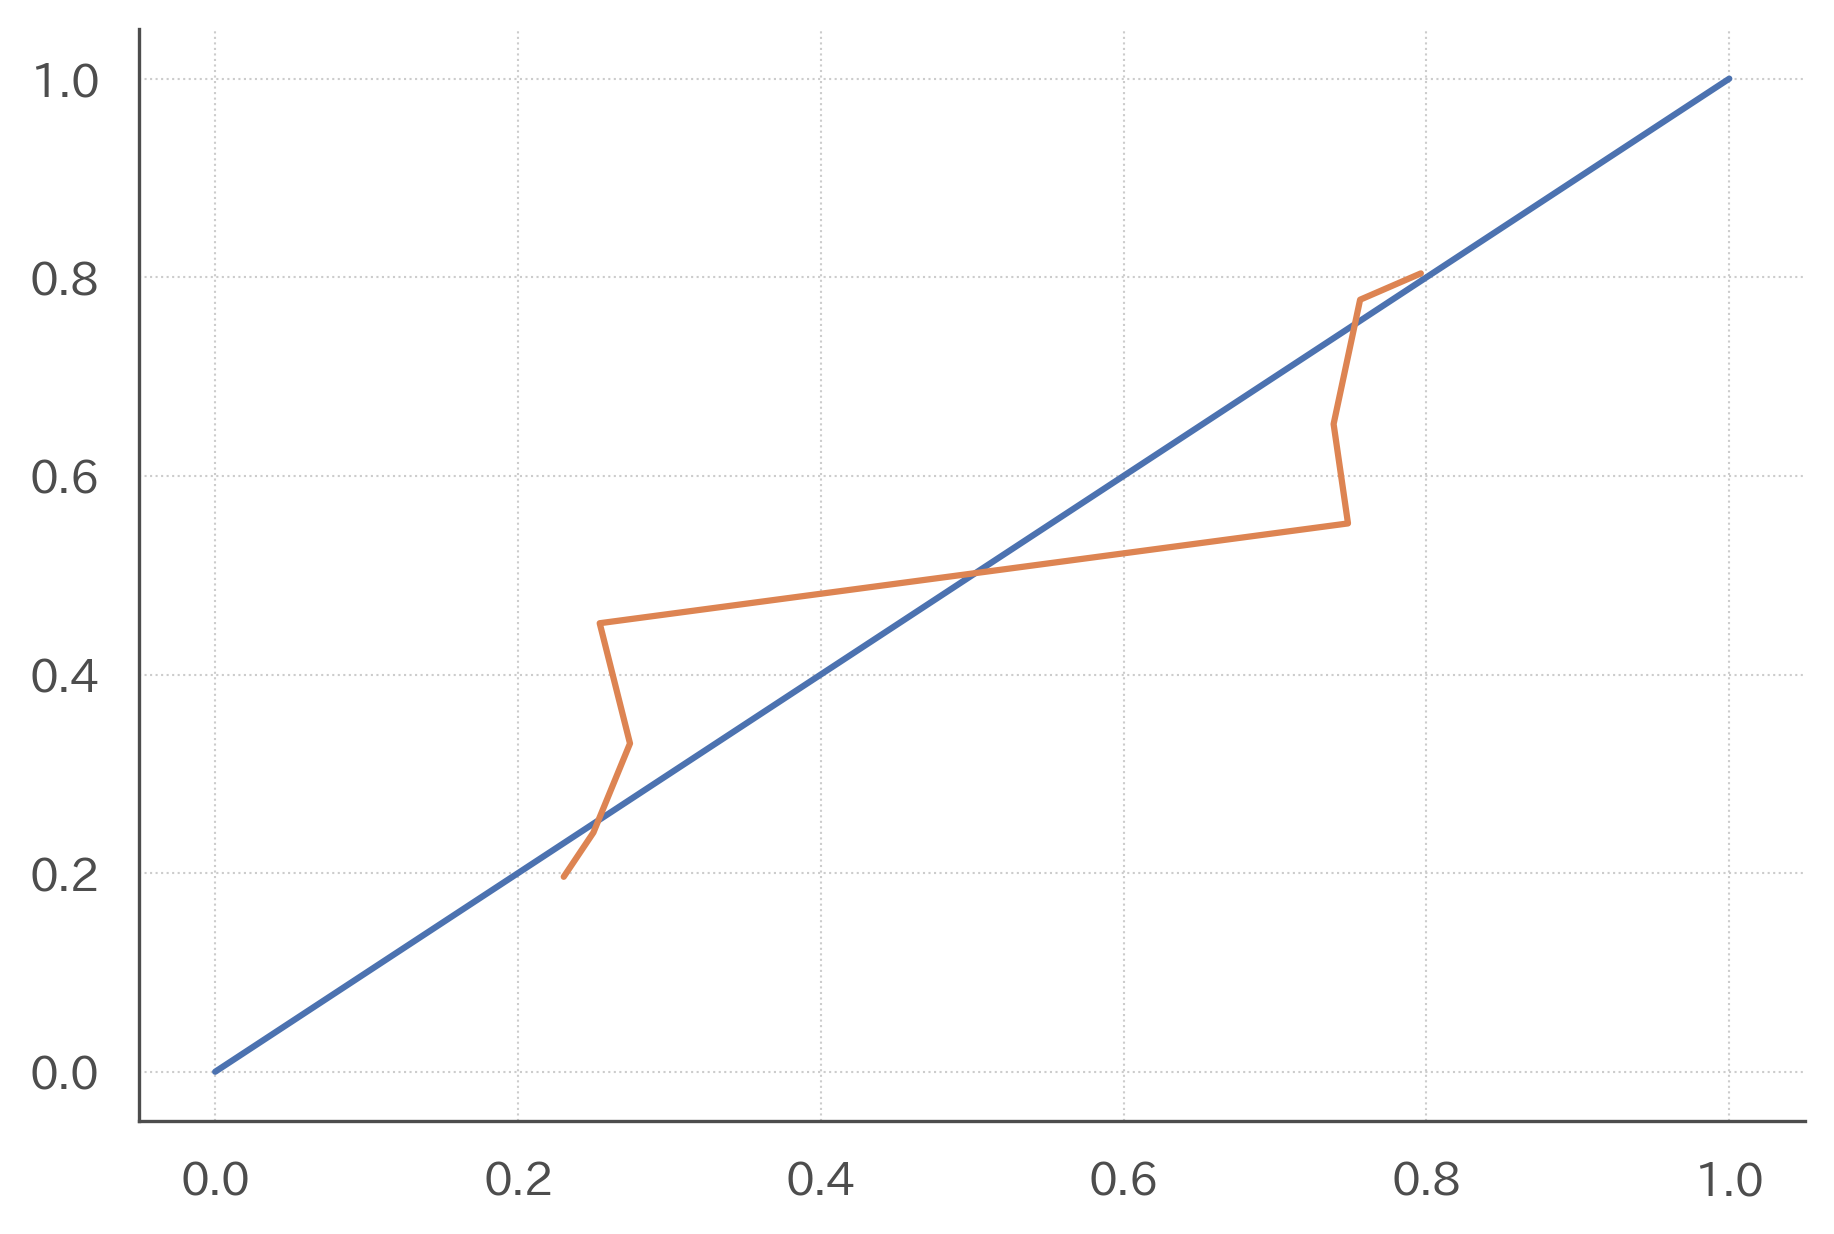

In [337]:
prob_true, prob_pred = calibration_curve(y_test, p_pred, n_bins=10)

fig, ax = plt.subplots()
ax.plot(np.linspace(0, 1), np.linspace(0, 1))
ax.plot(prob_true, prob_pred)

In [393]:
rf = RandomForestClassifier(min_samples_leaf=100, n_estimators=500, random_state=42, n_jobs=-1).fit(X_train, y_train)

y_pred = rf.predict(X_test)
p_pred = rf.predict_proba(X_test)[:, 1]

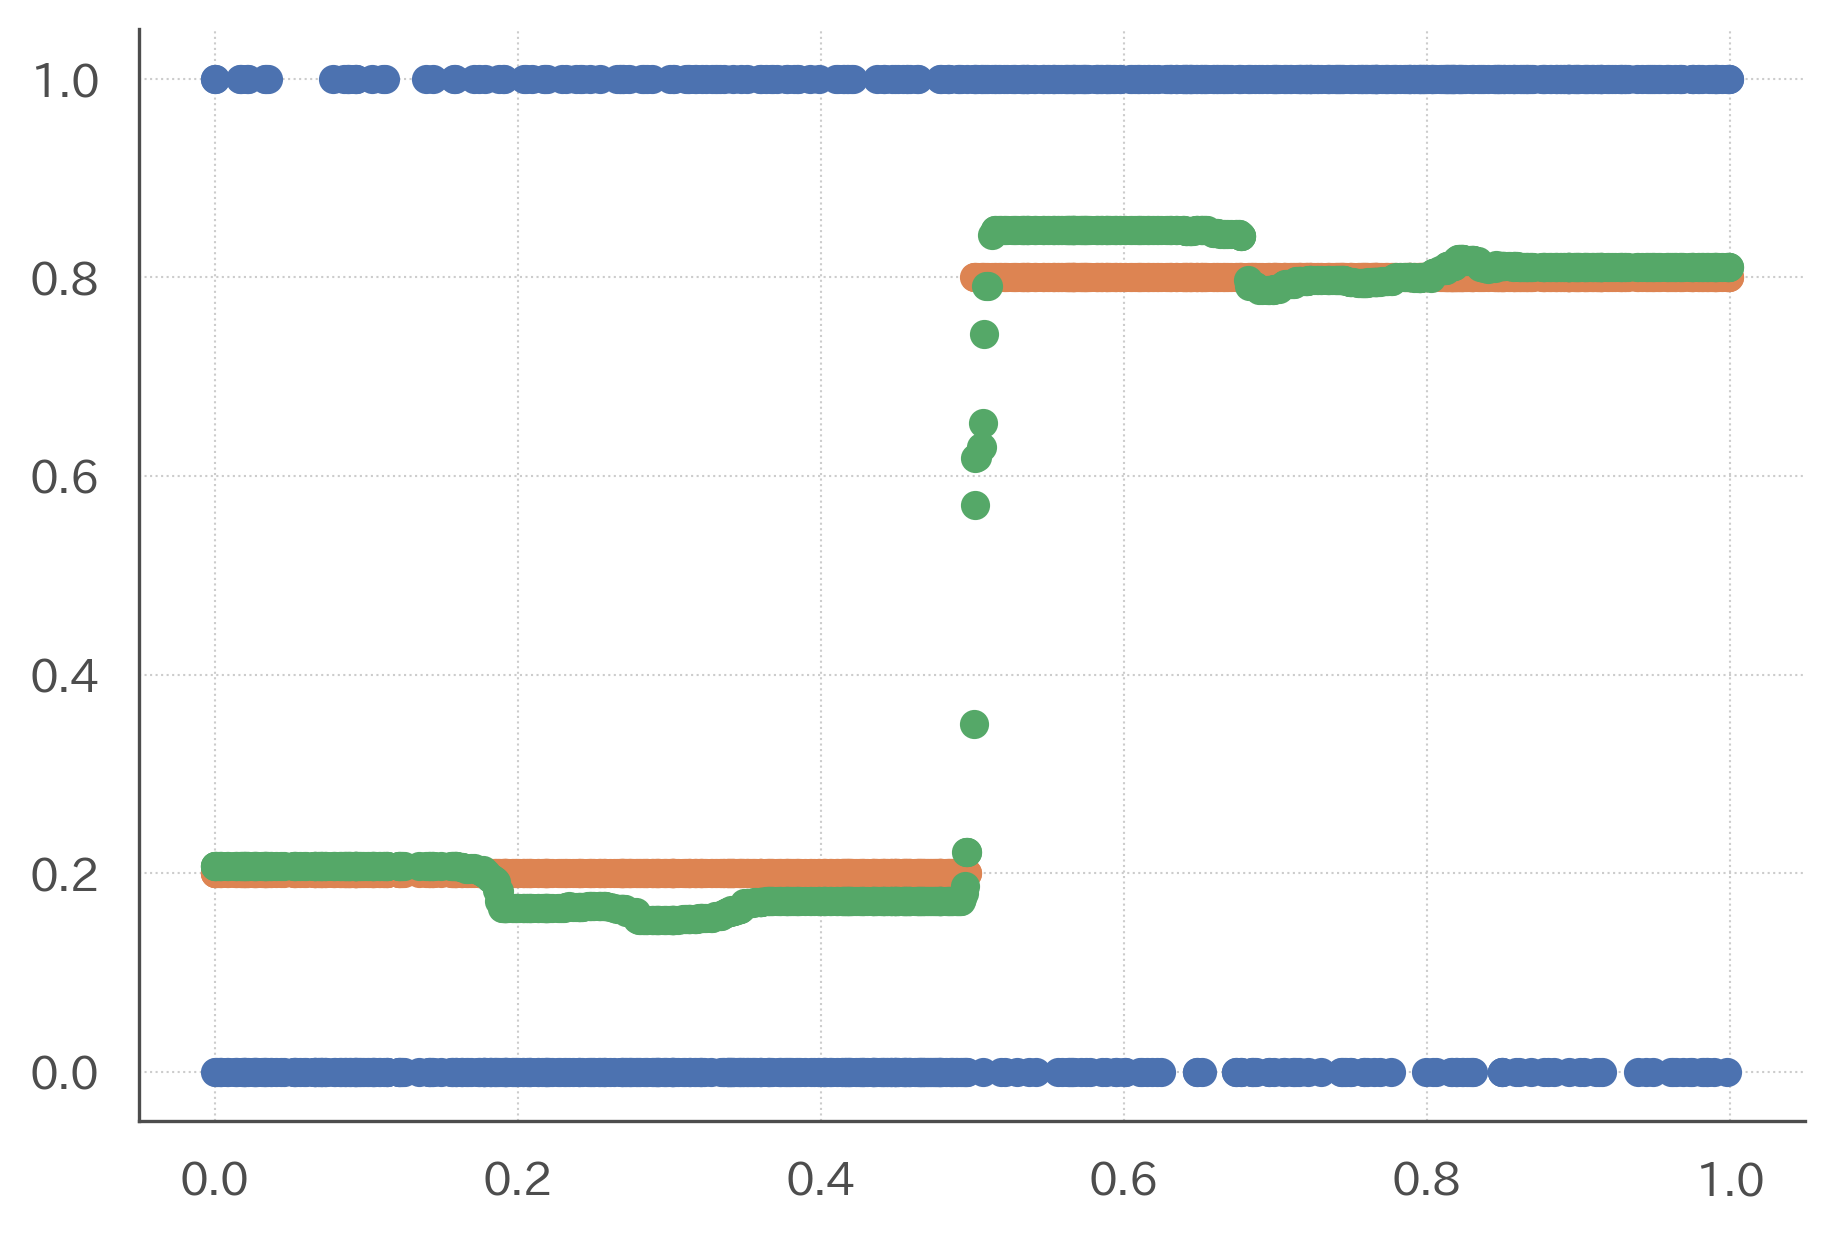

In [394]:
fig, ax = plt.subplots()
ax.scatter(x_test, y_test)
ax.scatter(x_test, p_test)
ax.scatter(x_test, p_pred)

<AxesSubplot:>

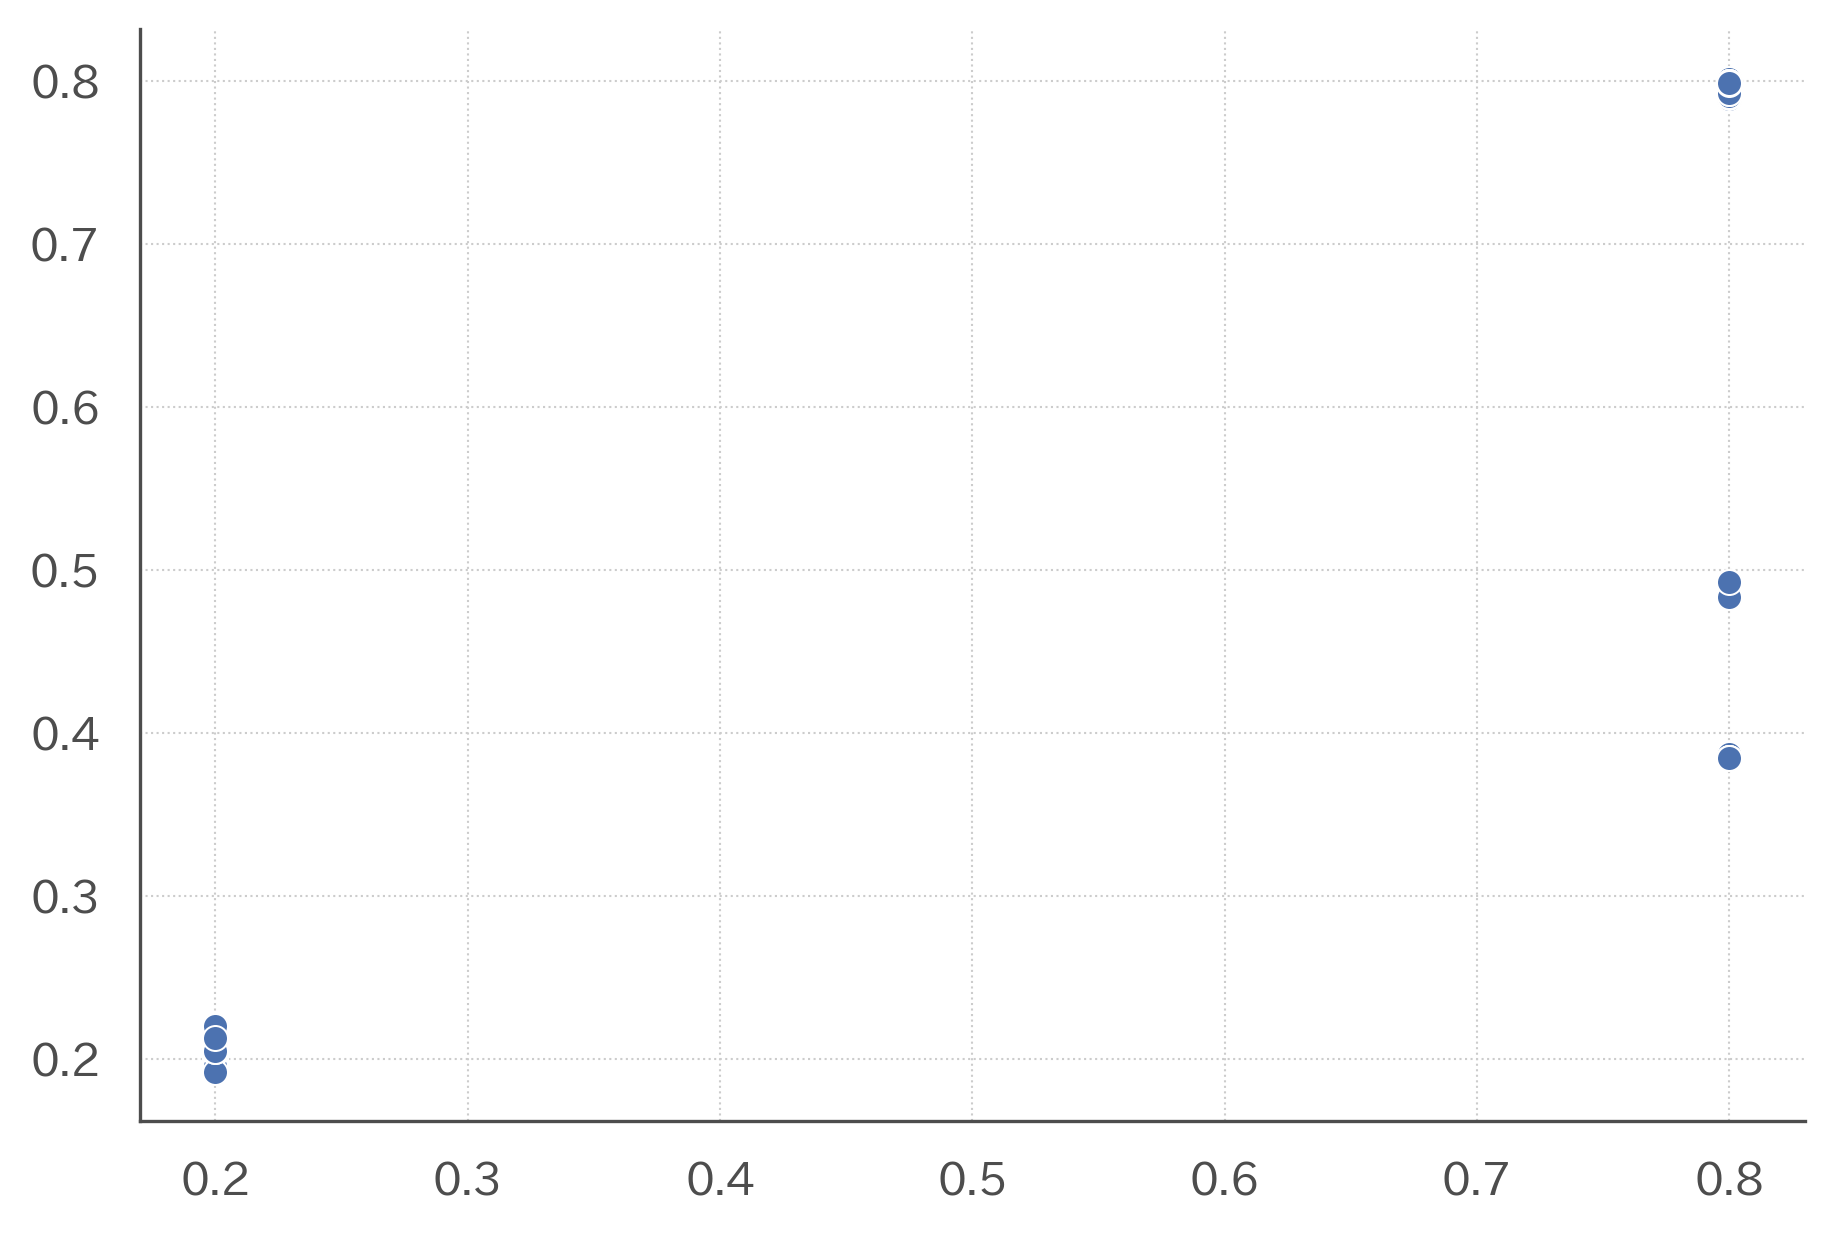

In [377]:
sns.scatterplot(p_test, p_pred)

In [378]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2553
           1       0.81      0.81      0.81      2447

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000



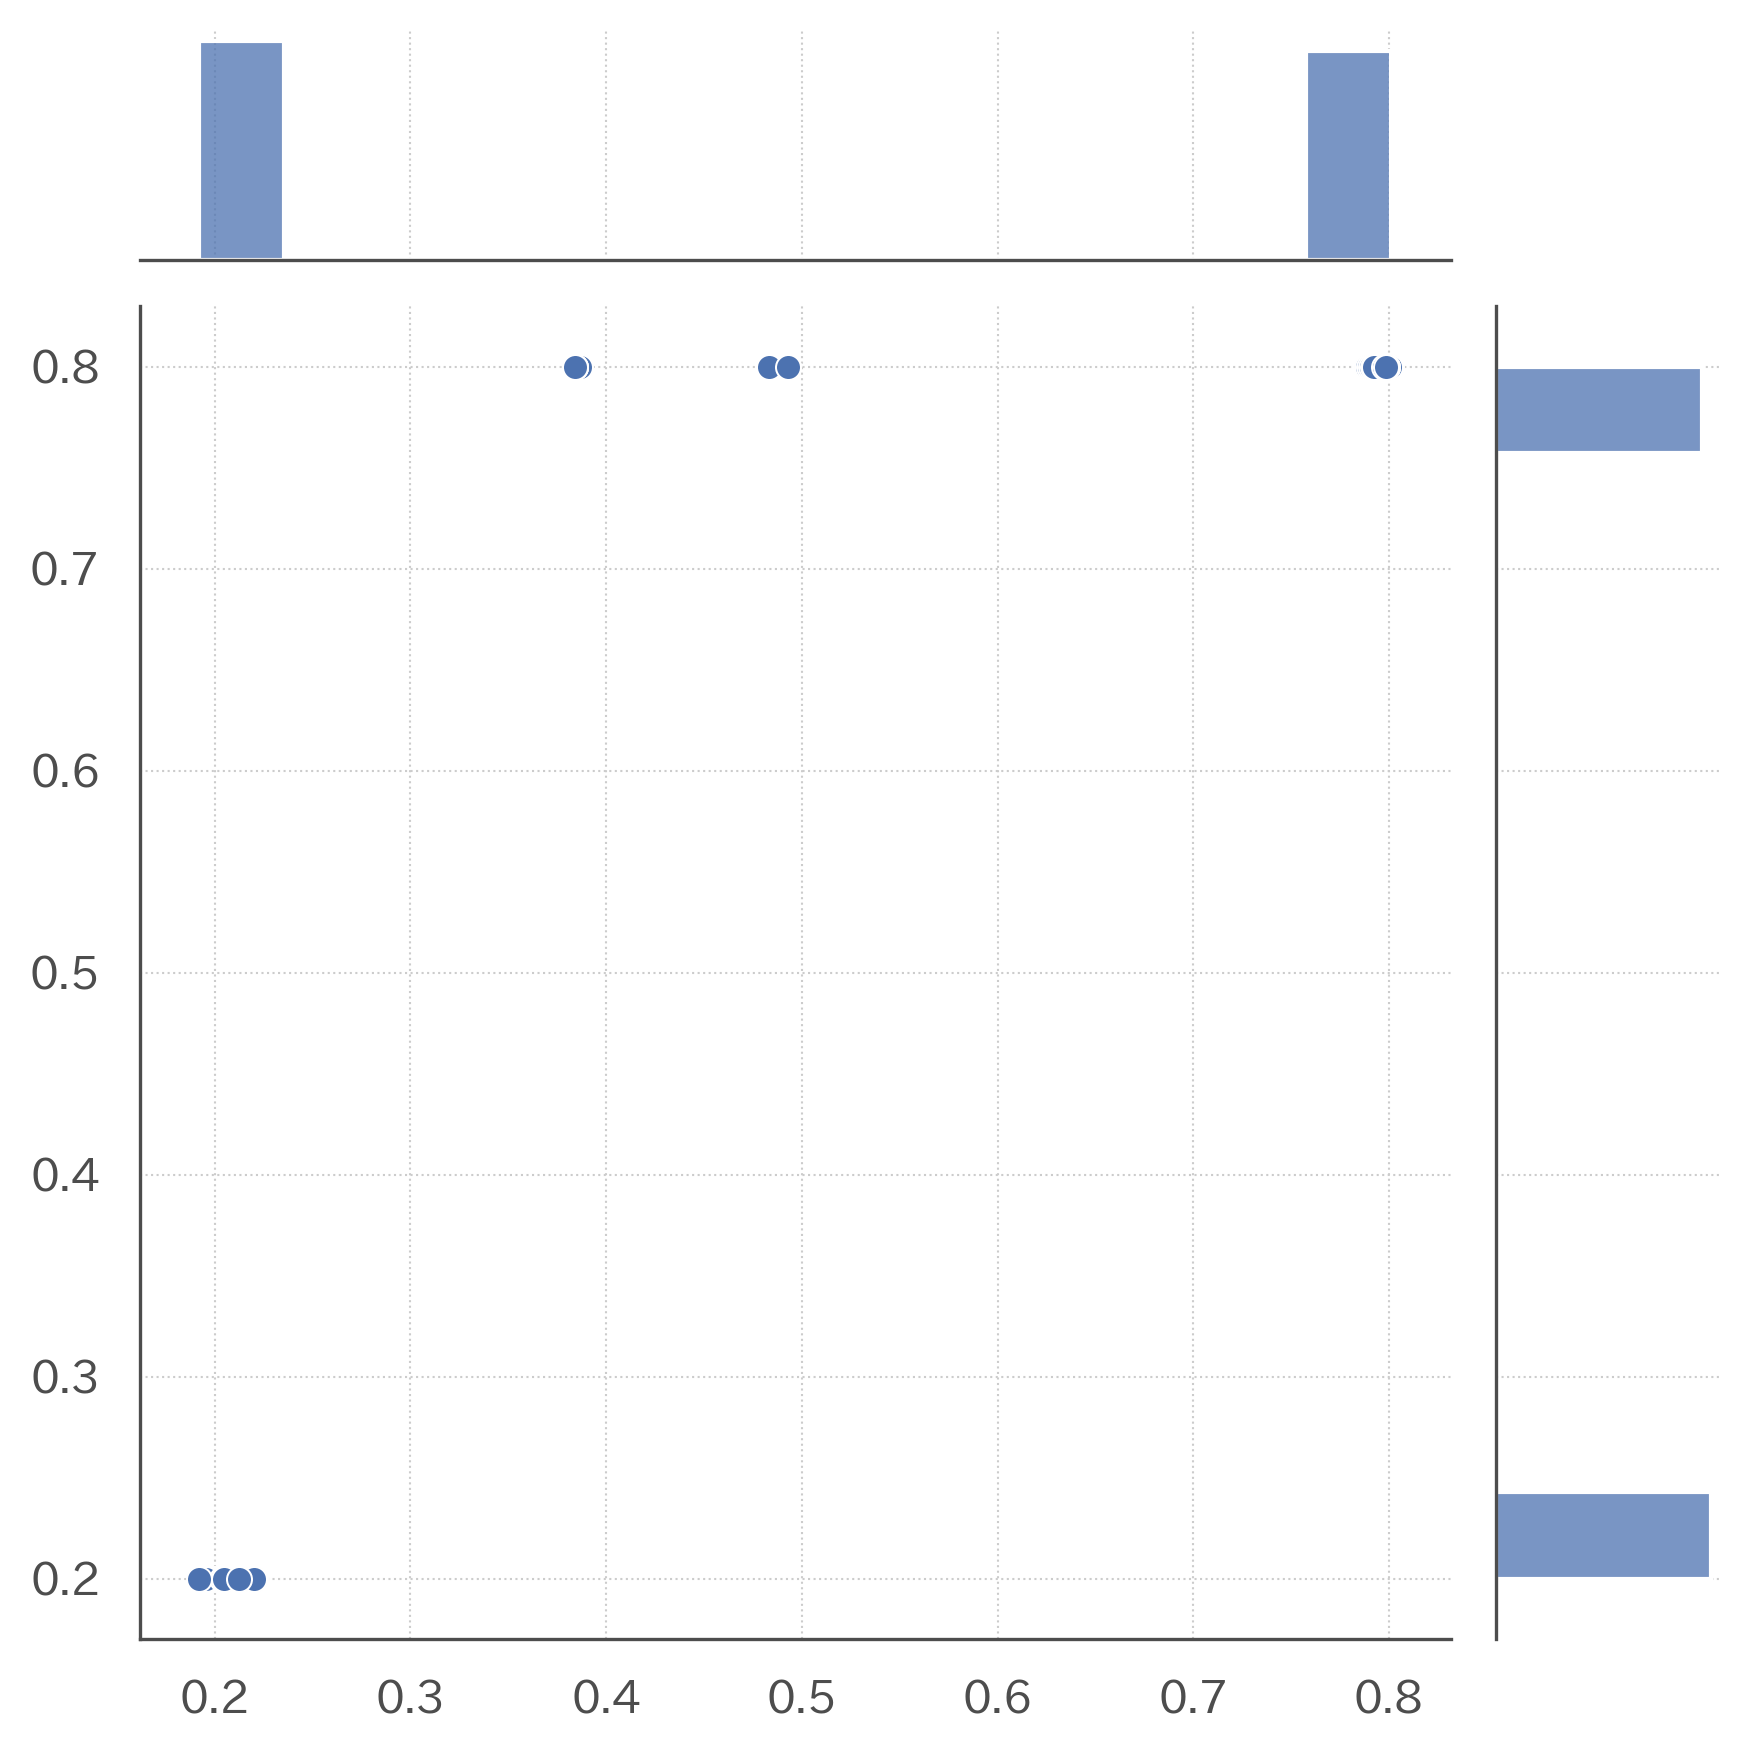

In [379]:
sns.jointplot(p_pred, p_test)

<AxesSubplot:>

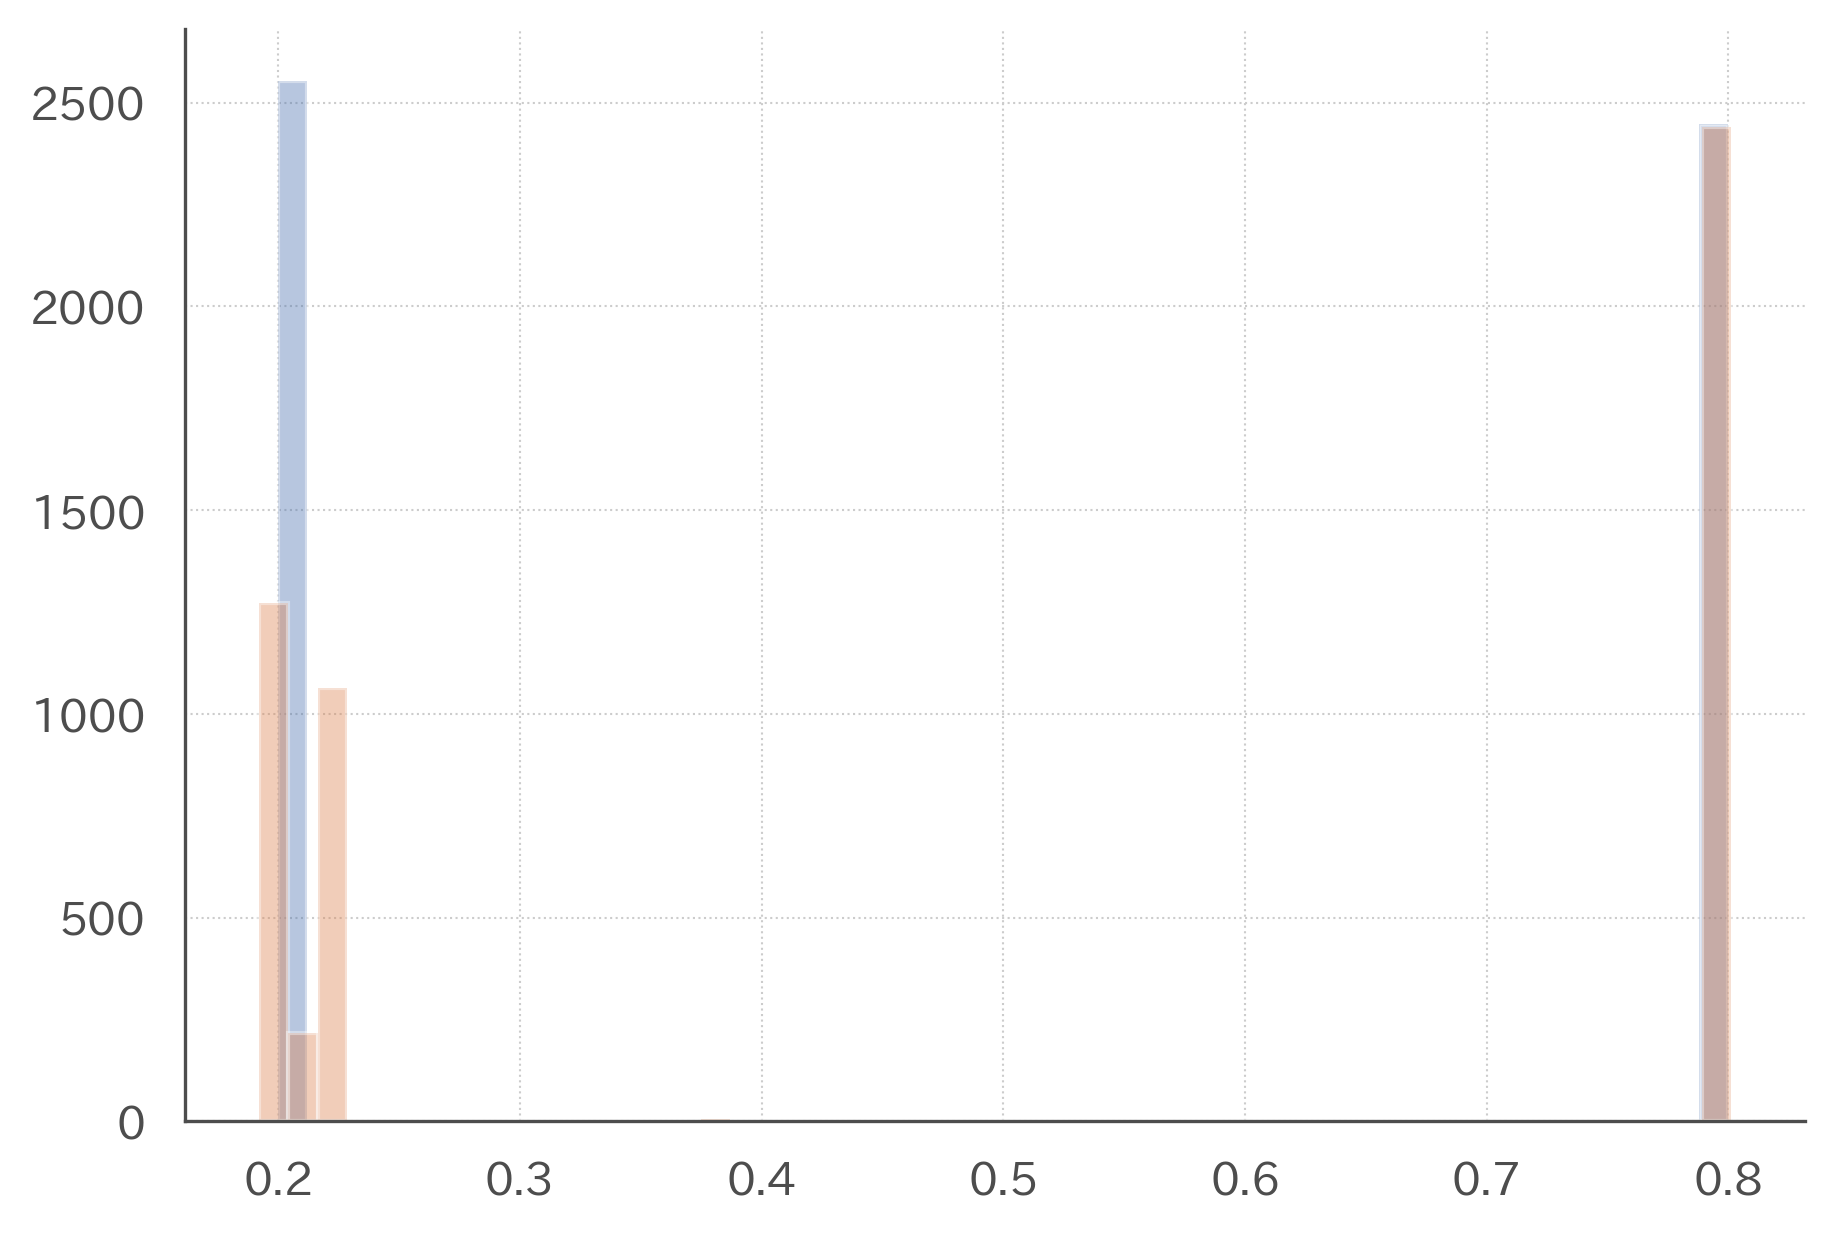

In [380]:
fig, ax = plt.subplots()
sns.distplot(p_test, kde=False, bins=50, ax=ax)
sns.distplot(p_pred, kde=False, bins=50, ax=ax)

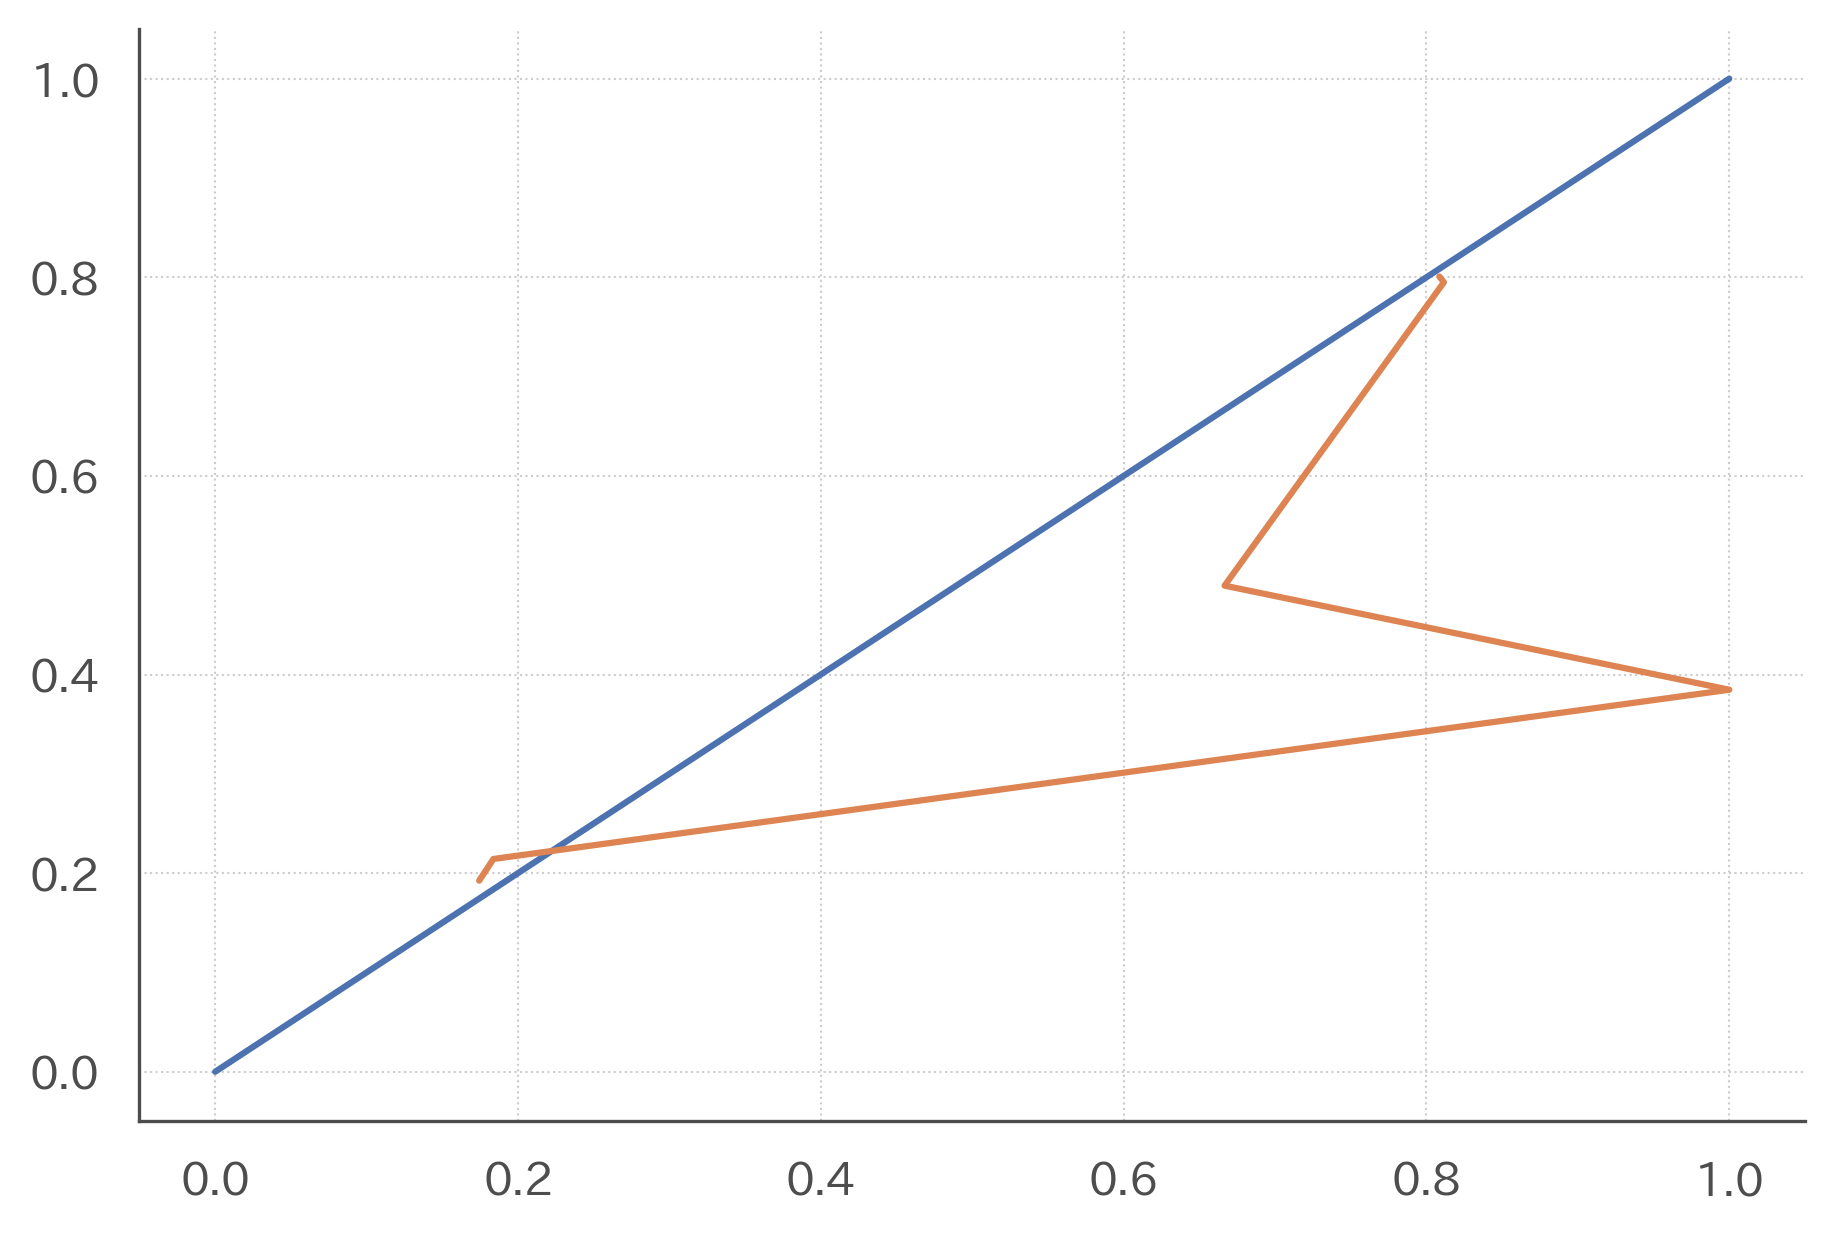

In [381]:
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_test, p_pred, n_bins=10)

fig, ax = plt.subplots()
ax.plot(np.linspace(0, 1), np.linspace(0, 1))
ax.plot(prob_true, prob_pred)

In [196]:
gb = HistGradientBoostingClassifier(
    max_depth=4, min_samples_leaf=50, learning_rate=0.03, max_iter=1000, random_state=42
).fit(X_train, y_train)

y_pred = gb.predict(X_test)
p_pred = gb.predict_proba(X_test)[:, 1]

<AxesSubplot:>

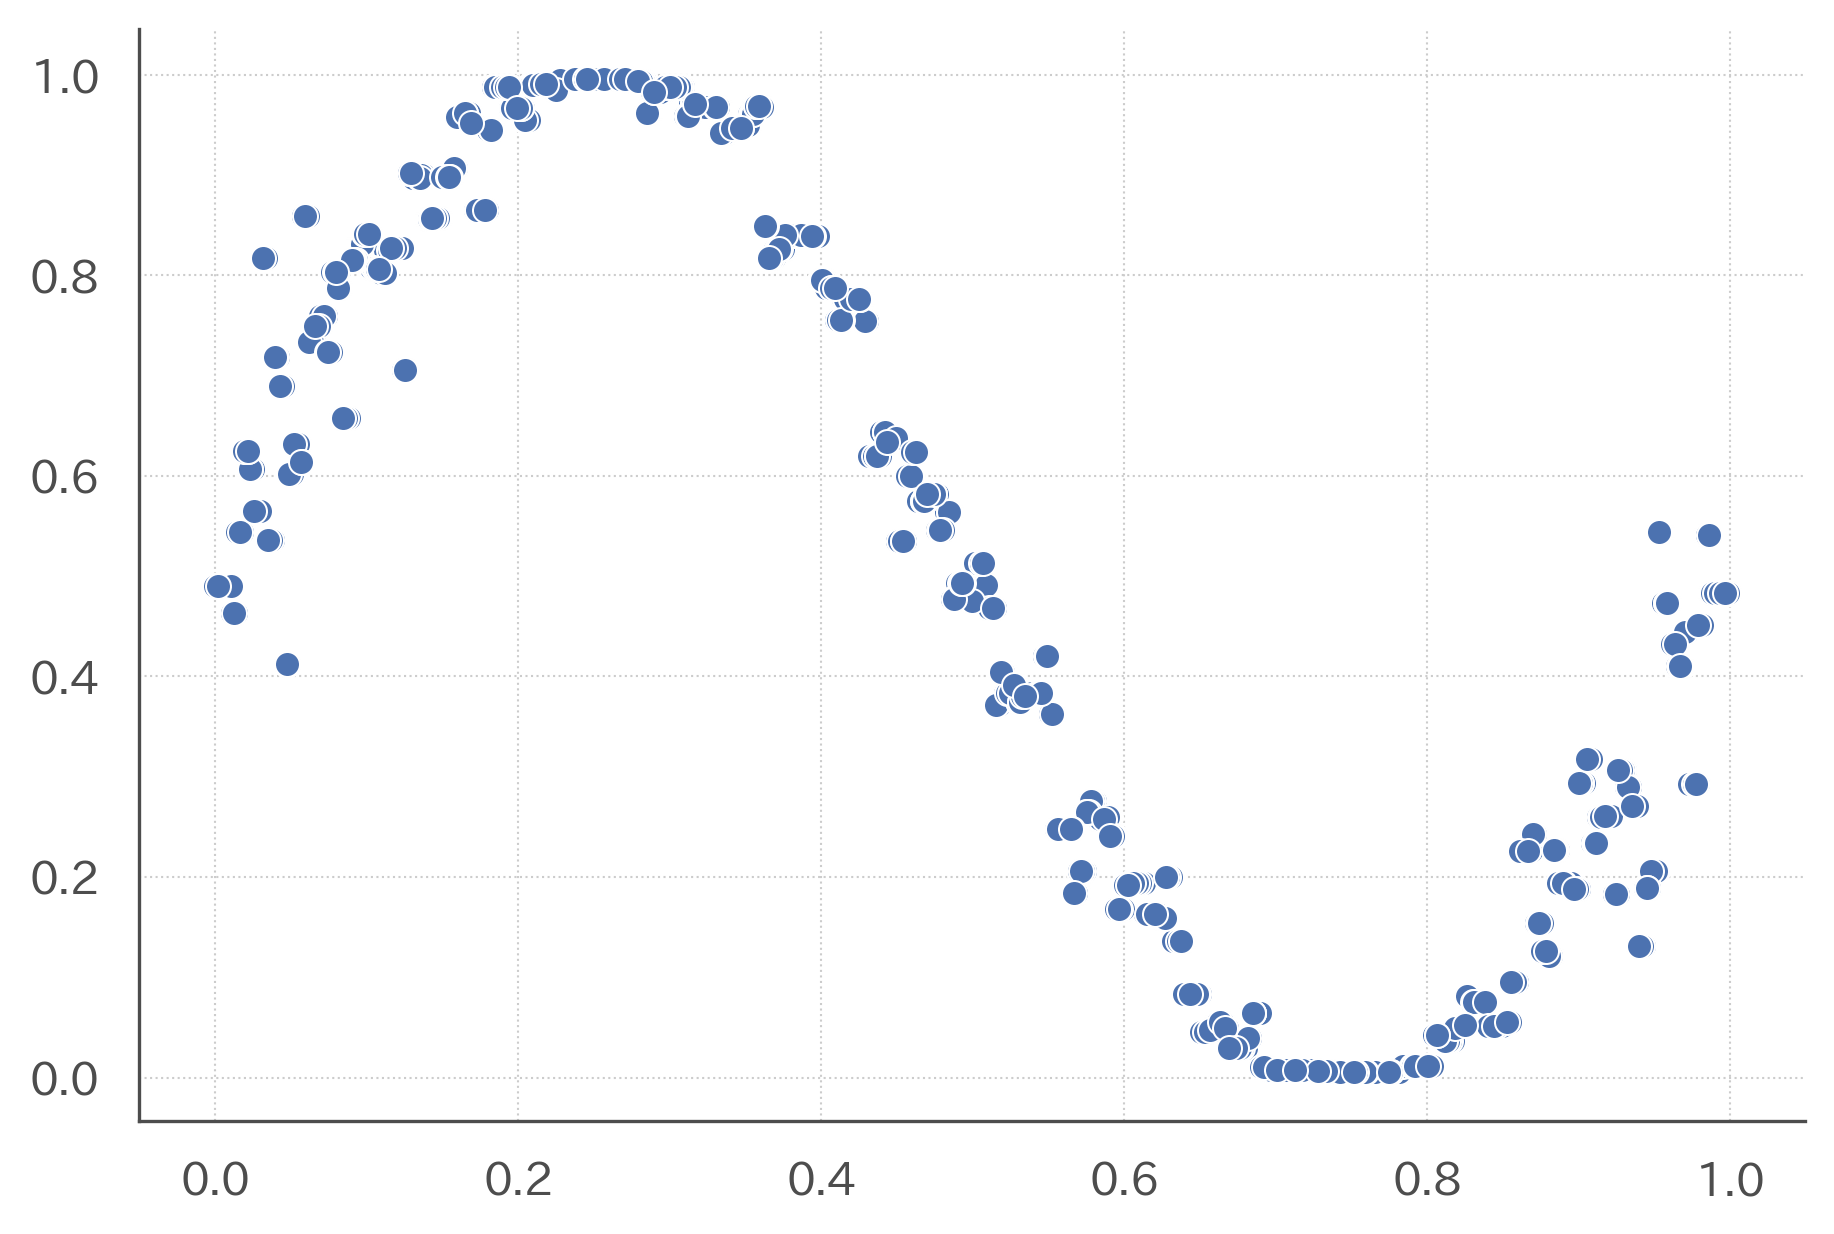

In [116]:
sns.scatterplot(x_test, p_pred)

<AxesSubplot:>

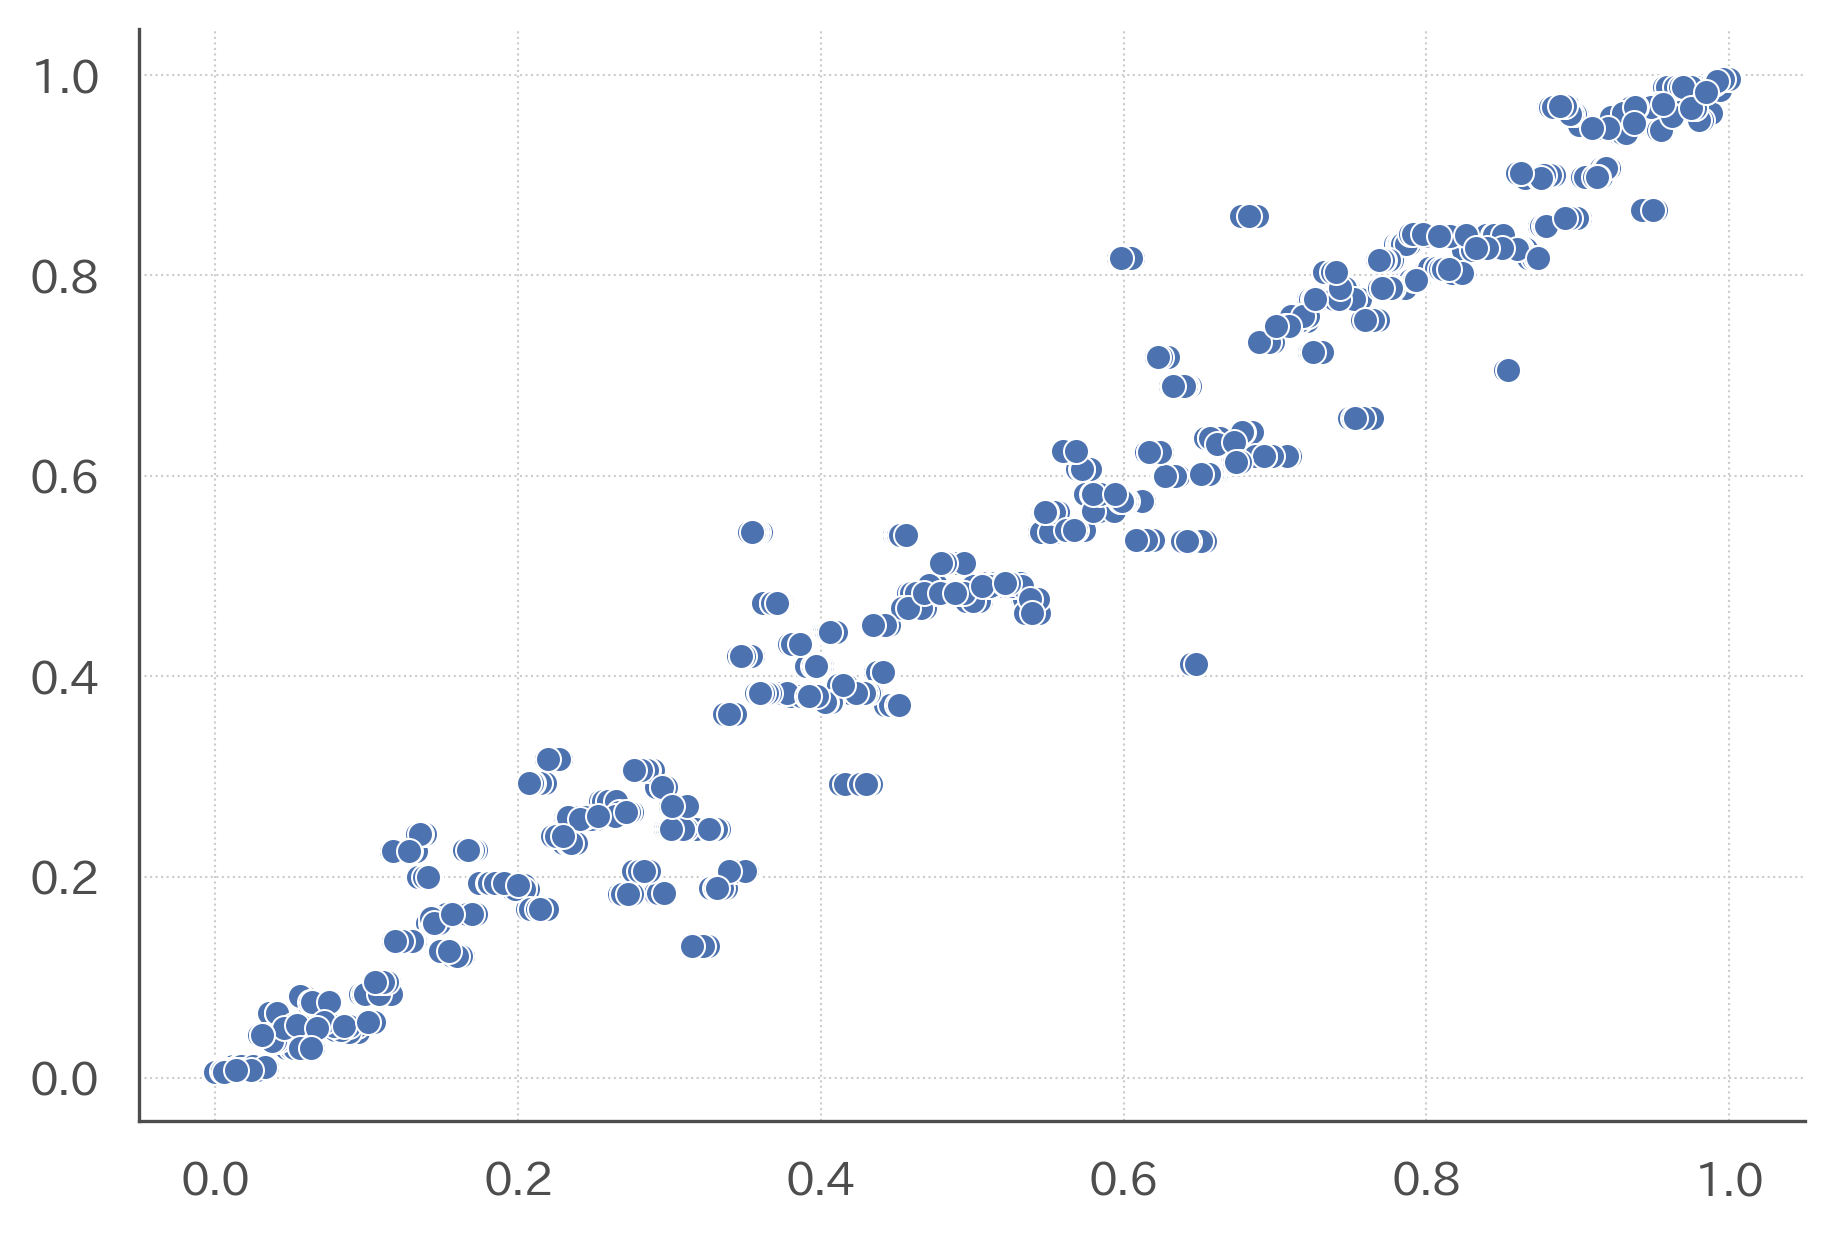

In [117]:
sns.scatterplot(p_test, p_pred)

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2505
           1       0.83      0.80      0.81      2495

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



In [223]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0)

<AxesSubplot:>

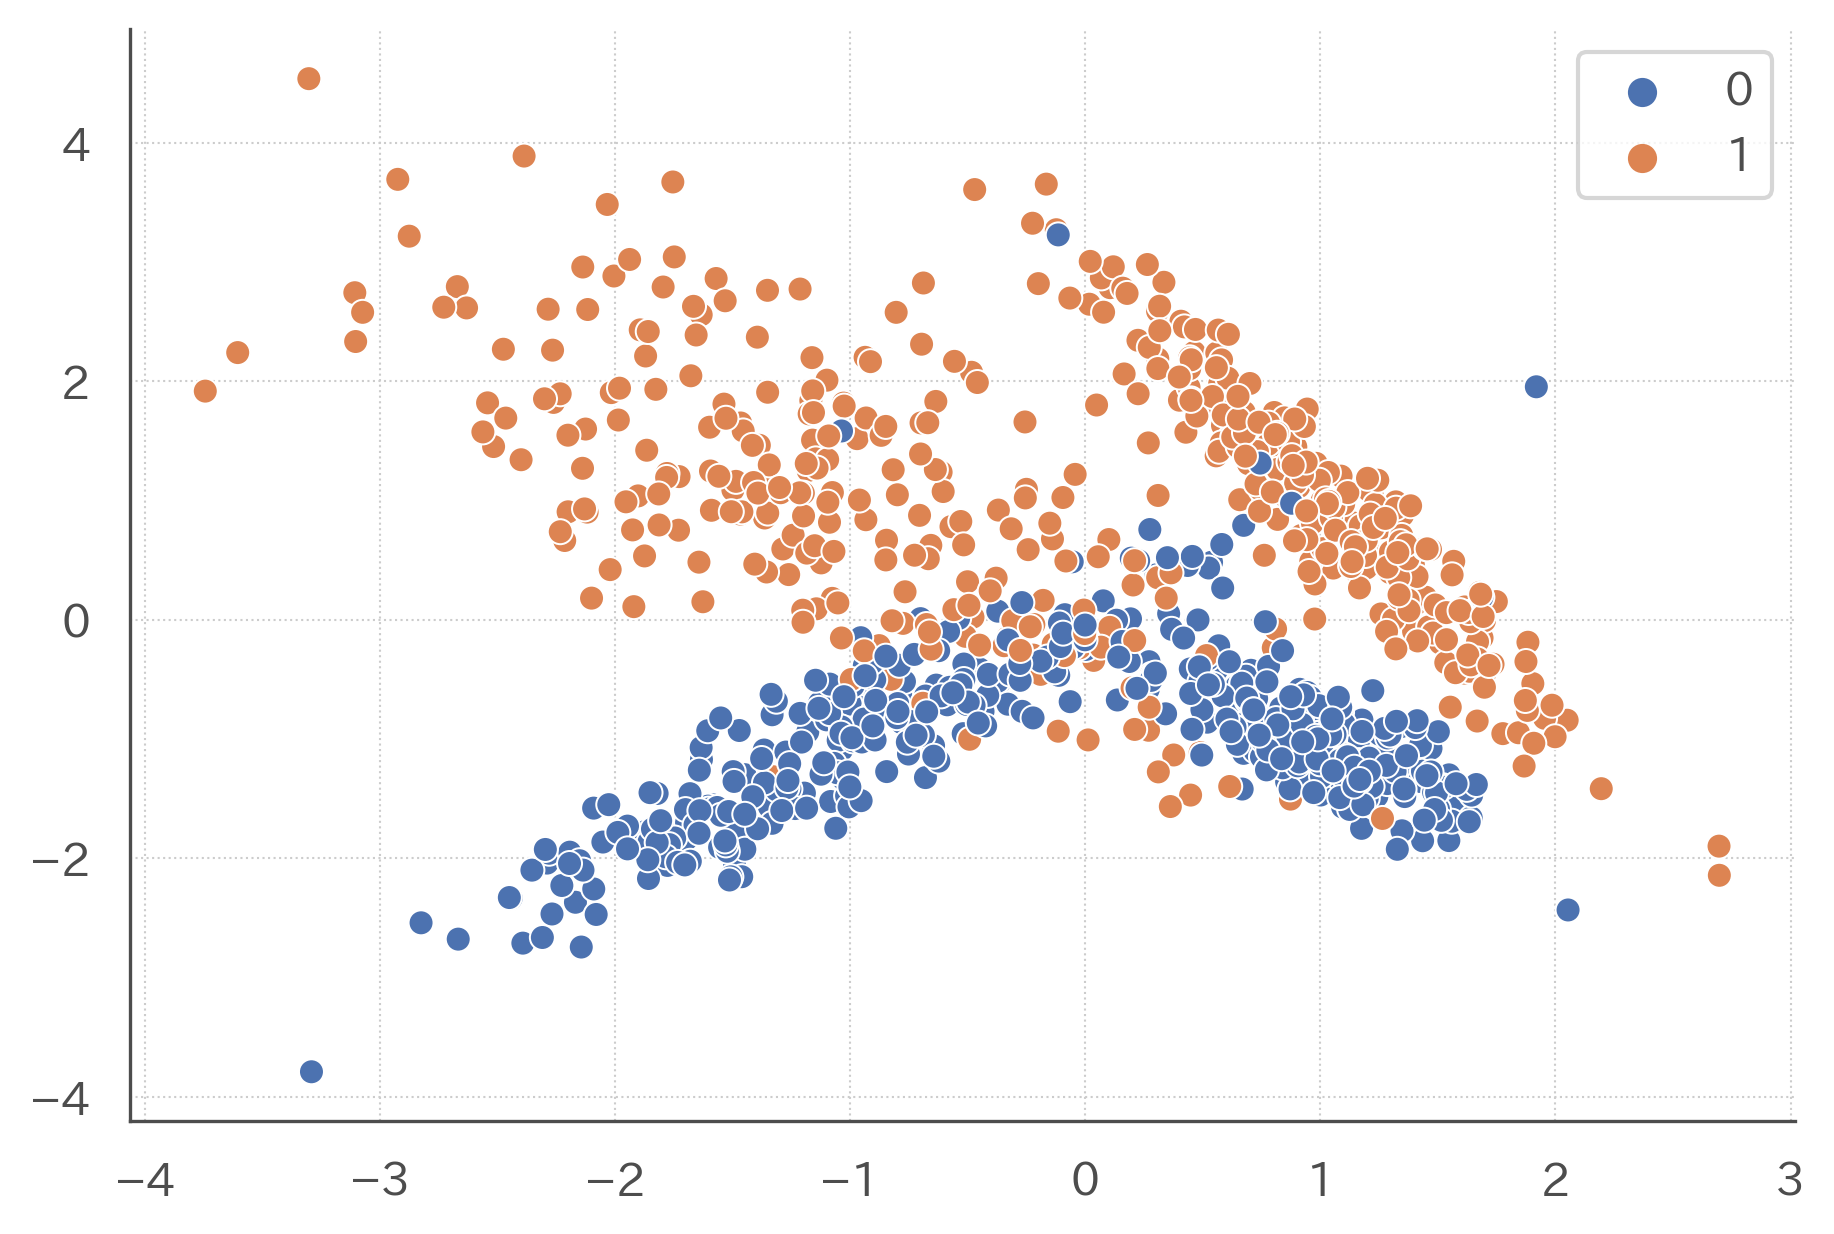

In [224]:
sns.scatterplot(X[:, 0], X[:, 1], hue = y)